Read And load the raw data in a dataframe and as we have a lot of columns we set the low_memory to false

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
eeg_df = pd.read_csv('DATA/RAW_eeg_data.csv', low_memory=False)

take a information about the head of the dataframe

In [2]:
eeg_df.tail(10)

,C3_T1,C3_T2,C3_T3,C3_T4,C3_T5,C3_T6,C3_T7,C3_T8,C3_T9,C3_T10,...,T6_T1016,T6_T1017,T6_T1018,T6_T1019,T6_T1020,T6_T1021,T6_T1022,T6_T1023,T6_T1024,Condition
172,-0.990100,2.970300,4.9505,9.9010,7.9208,3.9604,0.990100,4.950500,11.881000,13.861000,...,-6.69920,-2.79670,0.13008,-1.821100,-2.79670,-4.74800,-9.6260,-11.5770,-6.69920,Healthy
173,-8.910900,-9.901000,-3.9604,-2.9703,-0.9901,1.9802,-3.960400,6.930700,-2.970300,-15.842000,...,-0.84142,2.07120,-0.84142,-8.608400,-4.72490,-1.81230,-2.7832,-1.8123,5.95470,Healthy
174,-18.812000,-23.761999,-20.7920,-9.9010,-5.9406,-6.9307,-5.940600,-4.950500,0.990100,-2.970300,...,17.60500,15.66300,12.75100,11.780000,9.83820,5.95470,6.9256,4.9838,4.01290,Healthy
175,18.905001,21.891001,19.9000,12.9350,11.9400,13.9300,18.905001,22.886000,22.886000,18.905001,...,5.98370,0.13008,-6.69920,-13.528000,-14.50400,-10.60200,-7.6748,-9.6260,-10.60200,Healthy
176,21.891001,16.915001,13.9300,10.9450,8.9552,12.9350,10.945000,7.960200,13.930000,13.930000,...,9.93460,12.87600,11.89500,10.915000,4.05230,0.13072,5.0327,15.8170,15.81700,Healthy
177,-8.910900,-8.910900,-11.8810,-12.8710,-13.8610,-14.8510,-15.842000,-14.851000,-12.871000,-12.871000,...,-3.77240,-6.69920,-4.74800,-5.723600,-1.82110,5.00810,5.9837,3.0569,-1.82110,Healthy
178,-0.990100,-5.940600,-5.9406,-2.9703,-3.9604,0.0000,0.000000,-3.960400,-4.950500,0.000000,...,0.13008,7.93500,9.88620,5.008100,-0.84553,-5.72360,-10.6020,-16.4550,-22.30900,Healthy
179,-10.837000,-16.749001,-19.7040,-13.7930,-10.8370,-7.8818,-9.852200,-20.690001,-20.690001,-21.674999,...,-12.55300,-9.62600,-10.60200,-7.674800,-4.74800,-3.77240,-5.7236,-3.7724,-0.84553,Healthy
180,1.980200,6.930700,7.9208,10.8910,9.9010,8.9109,10.891000,11.881000,10.891000,10.891000,...,5.98370,7.93500,8.91060,7.935000,3.05690,4.03250,4.0325,5.9837,5.00810,Healthy
181,-10.837000,-9.852200,-7.8818,-9.8522,-8.8670,-4.9261,-5.911300,-7.881800,-7.881800,-8.867000,...,10.75700,11.72300,18.48600,20.419001,21.38500,21.38500,18.4860,13.6550,6.89210,Healthy


 Prepare features (X) and target (y)
 and encode the target columns as it is string but weed numerical values for the data

In [4]:
from sklearn.preprocessing import LabelEncoder
X = eeg_df.drop(columns=['Condition'])  
y = eeg_df['Condition'] 
# Encode the 'Condition' labels (AD=1, Healthy=0)
y = LabelEncoder().fit_transform(y)
feature_names = X.columns.tolist() 
print("Feature Names:", feature_names)

Feature Names: ['C3_T1', 'C3_T2', 'C3_T3', 'C3_T4', 'C3_T5', 'C3_T6', 'C3_T7', 'C3_T8', 'C3_T9', 'C3_T10', 'C3_T11', 'C3_T12', 'C3_T13', 'C3_T14', 'C3_T15', 'C3_T16', 'C3_T17', 'C3_T18', 'C3_T19', 'C3_T20', 'C3_T21', 'C3_T22', 'C3_T23', 'C3_T24', 'C3_T25', 'C3_T26', 'C3_T27', 'C3_T28', 'C3_T29', 'C3_T30', 'C3_T31', 'C3_T32', 'C3_T33', 'C3_T34', 'C3_T35', 'C3_T36', 'C3_T37', 'C3_T38', 'C3_T39', 'C3_T40', 'C3_T41', 'C3_T42', 'C3_T43', 'C3_T44', 'C3_T45', 'C3_T46', 'C3_T47', 'C3_T48', 'C3_T49', 'C3_T50', 'C3_T51', 'C3_T52', 'C3_T53', 'C3_T54', 'C3_T55', 'C3_T56', 'C3_T57', 'C3_T58', 'C3_T59', 'C3_T60', 'C3_T61', 'C3_T62', 'C3_T63', 'C3_T64', 'C3_T65', 'C3_T66', 'C3_T67', 'C3_T68', 'C3_T69', 'C3_T70', 'C3_T71', 'C3_T72', 'C3_T73', 'C3_T74', 'C3_T75', 'C3_T76', 'C3_T77', 'C3_T78', 'C3_T79', 'C3_T80', 'C3_T81', 'C3_T82', 'C3_T83', 'C3_T84', 'C3_T85', 'C3_T86', 'C3_T87', 'C3_T88', 'C3_T89', 'C3_T90', 'C3_T91', 'C3_T92', 'C3_T93', 'C3_T94', 'C3_T95', 'C3_T96', 'C3_T97', 'C3_T98', 'C3_T99', 'C3

divide data into 30% test and 70% train 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=3)


Now lets Apply the decison tree process : 

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train.values, Y_train)
unique, counts = np.unique(Y_train, return_counts=True)
# Create a dictionary to display the counts
count_dict = dict(zip(unique, counts))
print("Counts of each class label:", count_dict)

Counts of each class label: {np.int64(0): np.int64(112), np.int64(1): np.int64(15)}


Lets Predict via decision tree

In [12]:
prediction = dt.predict(X_test.values)

In [13]:
x_new = X_test.iloc[0].values.reshape(1, -1)
prediction = dt.predict(x_new)
print("Prediction for test example:", prediction)

Prediction for test example: [0]


Plot the decision tree elaborated 

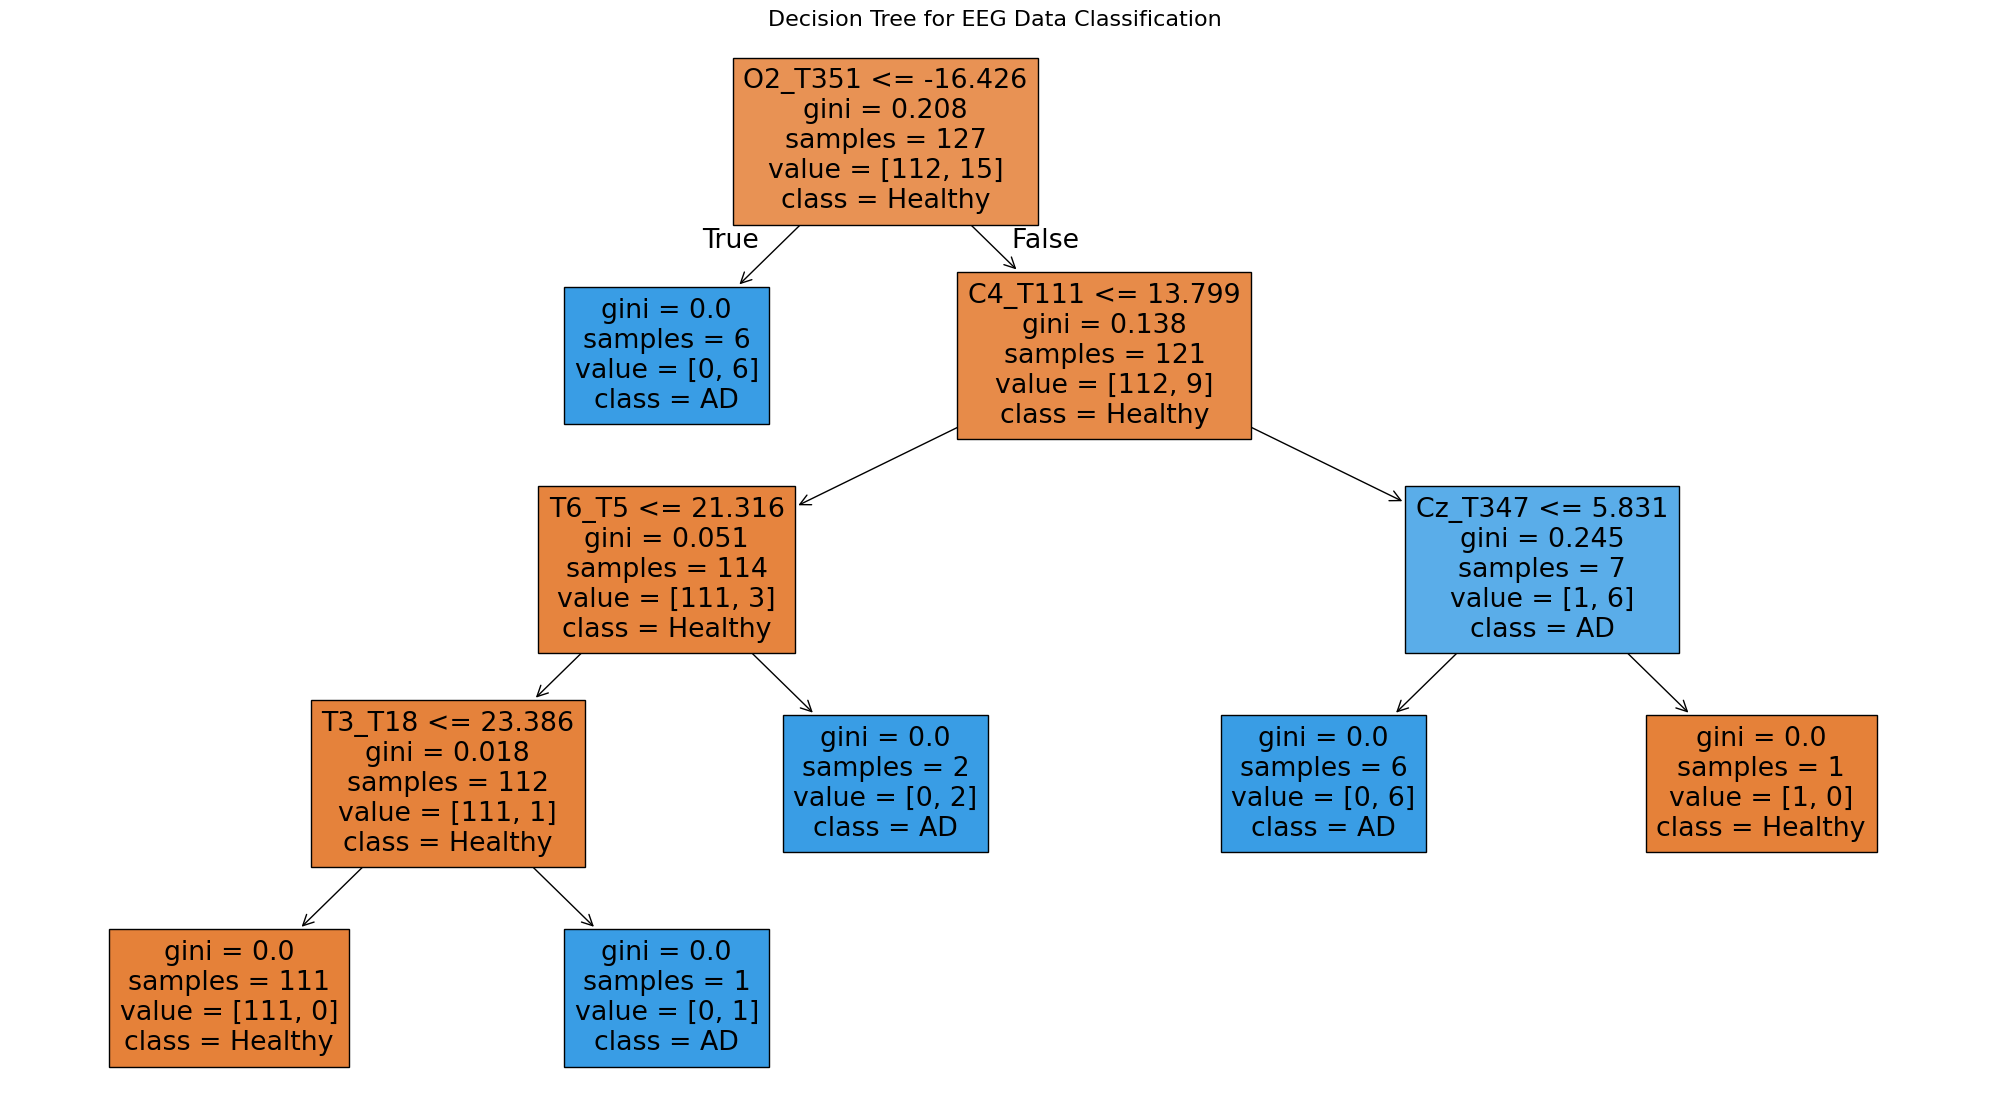

In [14]:
from sklearn.tree import plot_tree, export_text
# Plot the decision tree
plt.figure(figsize=(20, 11.25))  # Full HD aspect ratio 16:9
plot_tree(dt, feature_names=X.columns, class_names=['Healthy', 'AD'], filled=True)
plt.title("Decision Tree for EEG Data Classification", fontsize=16)
plt.tight_layout()  # Adjust layout to fit the figure nicely
plt.show()

Plot the tree by text (not graphic ) 

In [15]:
tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)

|--- O2_T351 <= -16.43
|   |--- class: 1
|--- O2_T351 >  -16.43
|   |--- C4_T111 <= 13.80
|   |   |--- T6_T5 <= 21.32
|   |   |   |--- T3_T18 <= 23.39
|   |   |   |   |--- class: 0
|   |   |   |--- T3_T18 >  23.39
|   |   |   |   |--- class: 1
|   |   |--- T6_T5 >  21.32
|   |   |   |--- class: 1
|   |--- C4_T111 >  13.80
|   |   |--- Cz_T347 <= 5.83
|   |   |   |--- class: 1
|   |   |--- Cz_T347 >  5.83
|   |   |   |--- class: 0



In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),  
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid.fit(X_train, Y_train)
print("Best hyperparameters:", grid.best_params_)


E:\Python\HomeWorkDM\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


In [31]:
# Final Decision Tree model with best hyperparameters
dt = DecisionTreeClassifier(criterion='gini', max_depth=2,min_samples_split=2 ,random_state=0)
dt.fit(X_train.values, Y_train)
print('Test score:', dt.score(X_test.values, Y_test))
print('Train score:', dt.score(X_train.values, Y_train))

Test score: 0.7272727272727273
Train score: 0.968503937007874


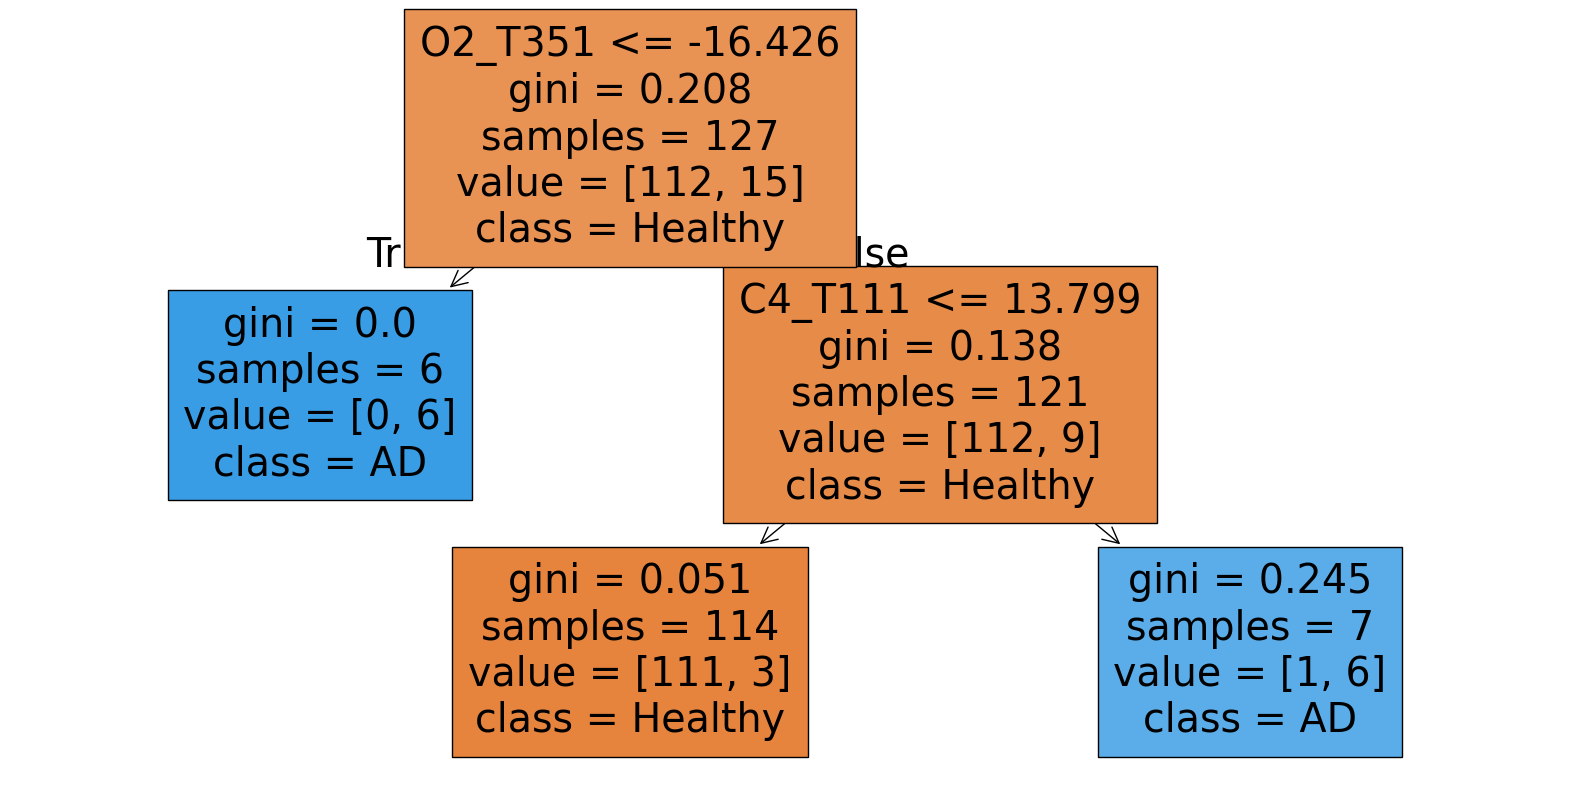

In [32]:

# Plot the optimized decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Healthy', 'AD'], filled=True)
plt.show()



Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=2, n_estimators=50, criterion='gini' ,random_state=2)
rf_classifier.fit(X_train.values, Y_train)

test_score = rf_classifier.score(X_test.values, Y_test)
train_score = rf_classifier.score(X_train.values, Y_train)
print('Random Forest Test score:', test_score)
print('Random Forest Train score:', train_score)

Random Forest Test score: 0.8727272727272727
Random Forest Train score: 0.937007874015748


E:\Python\HomeWorkDM\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Python\HomeWorkDM\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Plot the confusion matrix for that Random forest

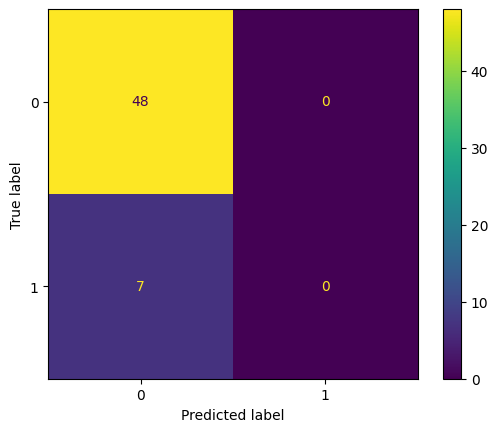

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = rf_classifier.predict(X_test.values)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
     'n_estimators': range(10, 50)
}

grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
grid.fit(X_train, Y_train)
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 34}


In [44]:
print("Best score:", grid.best_score_)

Best score: 0.8972307692307693


In [45]:
rf_classifier = RandomForestClassifier(max_depth=4, n_estimators=34, criterion='gini' ,random_state=0)
rf_classifier.fit(X_train.values, Y_train)



test_score = rf_classifier.score(X_test.values, Y_test)
train_score = rf_classifier.score(X_train.values, Y_train)
print('Random Forest Test score:', test_score)
print('Random Forest Train score:', train_score)

Random Forest Test score: 0.8727272727272727
Random Forest Train score: 1.0


Support Vector Machine Model

In [1]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC(kernel='rbf',gamma='auto') 
svm_model.fit(X_train.values, Y_train)

SVC(gamma='auto')

In [26]:
svm_test_score = svm_model.score(X_test.values, Y_test)
svm_train_score = svm_model.score(X_train.values, Y_train)
print('SVM Test score:', svm_test_score)
print('SVM Train score:', svm_train_score)

SVM Test score: 0.8727272727272727
SVM Train score: 1.0


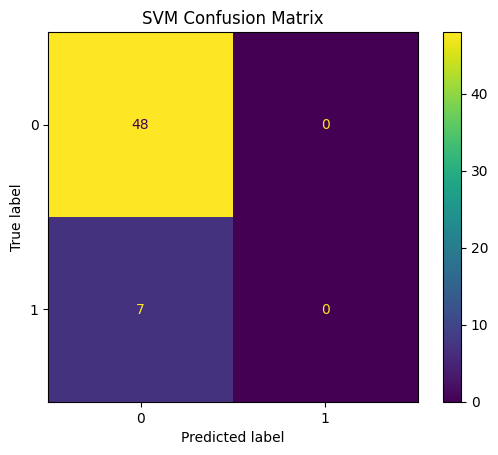

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_svm = svm_model.predict(X_test.values)
cm_svm = confusion_matrix(Y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('SVM Confusion Matrix')
plt.show()

KNN Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_model = KNeighborsClassifier(weights='distance',algorithm='auto',metric='manhattan')
knn_model.fit(X_train.values, Y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [24]:
knn_test_score = knn_model.score(X_test.values, Y_test)
knn_train_score = knn_model.score(X_train.values, Y_train)
print('KNN Test score:', knn_test_score)
print('KNN Train score:', knn_train_score)

KNN Test score: 0.8727272727272727
KNN Train score: 1.0


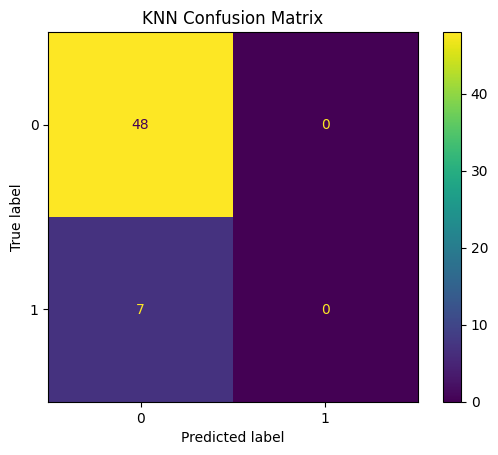

In [29]:
y_pred_knn = knn_model.predict(X_test.values)
cm_knn = confusion_matrix(Y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('KNN Confusion Matrix')
plt.show()